In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
row_data=pd.read_excel('house.xlsx')
data=row_data.copy()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58,23.1
1,0.78420,0.0,8.14,0,0.538,5.990,81.7,4.2579,4,307,21.0,386.75,14.67,17.5
2,0.80271,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21.0,288.99,11.69,20.2
3,0.72580,0.0,8.14,0,0.538,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2
4,1.25179,0.0,8.14,0,0.538,5.570,98.1,3.7979,4,307,21.0,376.57,21.02,13.6


In [3]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,3.725113,11.519388,11.291245,0.071429,0.556212,6.284278,68.504898,3.73919,9.736735,412.293878,18.494082,355.482612,12.685286,22.496939
std,8.718442,23.653517,6.903149,0.257803,0.117309,0.709173,28.417918,2.11221,8.782423,169.610933,2.150566,92.529659,7.140044,9.273200
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.12960,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082492,0.000000,5.190000,0.000000,0.448000,5.881000,43.475000,2.07370,4.000000,279.250000,17.400000,374.687500,7.037500,16.800000
50%,0.274475,0.000000,9.900000,0.000000,0.538000,6.209000,77.700000,3.09575,5.000000,337.000000,19.100000,391.260000,11.395000,21.200000
75%,3.821375,16.250000,18.100000,0.000000,0.631000,6.628000,94.100000,5.10040,24.000000,666.000000,20.200000,396.192500,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.12650,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
print(scaler.fit(data))
DataScaled = scaler.fit_transform(data)
DataScaled=pd.DataFrame(DataScaled,columns=data.columns)

MinMaxScaler()


In [6]:
DataScaled.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,0.041769,0.115194,0.397040,0.071429,0.352287,0.521801,0.675643,0.237302,0.379858,0.429950,0.627030,0.895564,0.302298,0.388821
std,0.097996,0.236535,0.253048,0.257803,0.241378,0.135883,0.292667,0.192073,0.381844,0.323685,0.228784,0.233319,0.197021,0.206071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000825,0.000000,0.173387,0.000000,0.129630,0.444530,0.417868,0.085851,0.130435,0.176050,0.510638,0.943990,0.146454,0.262222
50%,0.002983,0.000000,0.346041,0.000000,0.314815,0.507377,0.770340,0.178791,0.173913,0.286260,0.691489,0.985778,0.266694,0.360000
75%,0.042851,0.162500,0.646628,0.000000,0.506173,0.587660,0.939238,0.361084,1.000000,0.914122,0.808511,0.998216,0.420116,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


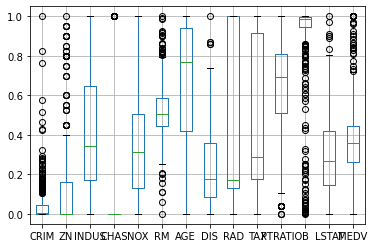

In [7]:
boxplot=DataScaled.boxplot()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
x=DataScaled.drop('MEDV',axis=1)
y=DataScaled['MEDV']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
y_test.shape

(98,)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

In [11]:
# first input and first hidden layer
model= Sequential()
model.add(Dense(units=20,input_dim=13,activation='relu'))

In [12]:
# second hidden layer
model.add(Dense(units=10,activation='relu'))

In [13]:
# output layer
model.add(Dense(1,activation='linear'))

In [14]:
model.compile(optimizer="Adam",loss='mean_squared_error',metrics=['accuracy'])

In [15]:
model.fit(x_train,y_train,batch_size=10,epochs=2000,verbose=1)

Epoch 1/2000
40/40 [==============================] - 1s 2ms/step - loss: 0.1063 - accuracy: 0.0204
Epoch 2/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.0230
Epoch 3/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.0255
Epoch 4/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.0332
Epoch 5/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 0.0332
Epoch 6/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.0332
Epoch 7/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.0357
Epoch 8/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 0.0383
Epoch 9/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.0383
Epoch 10/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 0.0383

40/40 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.0434
Epoch 82/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.0434
Epoch 83/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.0434
Epoch 84/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.0434
Epoch 85/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.0434
Epoch 86/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.0434
Epoch 87/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.0434
Epoch 88/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0434
Epoch 89/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.0434
Epoch 90/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0434
Epoc

40/40 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.0434  
Epoch 162/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.0434
Epoch 163/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.0434  
Epoch 164/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.0434
Epoch 165/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.0434
Epoch 166/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.0434
Epoch 167/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.0434
Epoch 168/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.0434
Epoch 169/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.0434  
Epoch 170/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0020 - accura

40/40 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0434
Epoch 242/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.0434
Epoch 243/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.0434
Epoch 244/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.0434
Epoch 245/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.0434
Epoch 246/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0434
Epoch 247/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.0434  
Epoch 248/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.0434  
Epoch 249/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 0.0434
Epoch 250/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy

40/40 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.0434
Epoch 322/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 0.0434  
Epoch 323/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.0434
Epoch 324/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.0434  
Epoch 325/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.0434
Epoch 326/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.0434  
Epoch 327/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.0434
Epoch 328/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.0434  
Epoch 329/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.0434
Epoch 330/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0021 - accu

40/40 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.0434
Epoch 401/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.0434
Epoch 402/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.0434
Epoch 403/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.0434  
Epoch 404/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.0434  
Epoch 405/2000
40/40 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 0.0448   - 0s 2ms/step - loss: 0.0015 - accuracy: 0.0434
Epoch 406/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.0434
Epoch 407/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.0434  
Epoch 408/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.0434
Epoch 409/2000
40/40 [=======================

40/40 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.0434
Epoch 479/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0434
Epoch 480/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0434
Epoch 481/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0434
Epoch 482/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.0434
Epoch 483/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0434  
Epoch 484/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0434
Epoch 485/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0434
Epoch 486/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0434  
Epoch 487/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy

40/40 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 0.0434
Epoch 559/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.0434
Epoch 560/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.0434  
Epoch 561/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0434
Epoch 562/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0434
Epoch 563/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.0434
Epoch 564/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.0434
Epoch 565/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0434  
Epoch 566/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0434
Epoch 567/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy

40/40 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0434  
Epoch 638/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0434
Epoch 639/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0434  
Epoch 640/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0434  
Epoch 641/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0434  
Epoch 642/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.0434
Epoch 643/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.0434  
Epoch 644/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.0434  
Epoch 645/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.0434
Epoch 646/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0013 - 

40/40 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0434
Epoch 717/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.0434
Epoch 718/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.9478e-04 - accuracy: 0.0434
Epoch 719/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.8441e-04 - accuracy: 0.0434
Epoch 720/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0434  
Epoch 721/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0434
Epoch 722/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.8708e-04 - accuracy: 0.0434
Epoch 723/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.4828e-04 - accuracy: 0.0434
Epoch 724/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0434
Epoch 725/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0

40/40 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.0434  
Epoch 795/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0434  
Epoch 796/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0434  
Epoch 797/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.6356e-04 - accuracy: 0.0434
Epoch 798/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0434  
Epoch 799/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0434
Epoch 800/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0434  
Epoch 801/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0434
Epoch 802/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0434  
Epoch 803/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.001

40/40 [==============================] - 0s 2ms/step - loss: 8.7734e-04 - accuracy: 0.0434
Epoch 873/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.6715e-04 - accuracy: 0.0434
Epoch 874/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0434
Epoch 875/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.2640e-04 - accuracy: 0.0434
Epoch 876/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0434
Epoch 877/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.0434
Epoch 878/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.6934e-04 - accuracy: 0.0434
Epoch 879/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.4406e-04 - accuracy: 0.0434
Epoch 880/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.0434  
Epoch 881/2000
40/40 [==============================] - 0s 2ms/step - loss:

40/40 [==============================] - 0s 2ms/step - loss: 9.3599e-04 - accuracy: 0.0434
Epoch 951/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0434  
Epoch 952/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.2703e-04 - accuracy: 0.0434
Epoch 953/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.9804e-04 - accuracy: 0.0434
Epoch 954/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.0434
Epoch 955/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.3701e-04 - accuracy: 0.0434
Epoch 956/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.2305e-04 - accuracy: 0.0434
Epoch 957/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.7055e-04 - accuracy: 0.0434
Epoch 958/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.8886e-04 - accuracy: 0.0434
Epoch 959/2000
40/40 [==============================] - 0s 2ms/step

40/40 [==============================] - 0s 2ms/step - loss: 8.5868e-04 - accuracy: 0.0434
Epoch 1028/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.2435e-04 - accuracy: 0.0434
Epoch 1029/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.3206e-04 - accuracy: 0.0434
Epoch 1030/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.0434
Epoch 1031/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0434
Epoch 1032/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.0434  
Epoch 1033/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.0434
Epoch 1034/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.0434  
Epoch 1035/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0434  
Epoch 1036/2000
40/40 [==============================] - 0s 1ms/step - 

40/40 [==============================] - 0s 2ms/step - loss: 8.8325e-04 - accuracy: 0.0434
Epoch 1105/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.8861e-04 - accuracy: 0.0434
Epoch 1106/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.1487e-04 - accuracy: 0.0434
Epoch 1107/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.3942e-04 - accuracy: 0.0434
Epoch 1108/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.0584e-04 - accuracy: 0.0434
Epoch 1109/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.0434  
Epoch 1110/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.0053e-04 - accuracy: 0.0434
Epoch 1111/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.4158e-04 - accuracy: 0.0434
Epoch 1112/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.0531e-04 - accuracy: 0.0434
Epoch 1113/2000
40/40 [==============================] 

40/40 [==============================] - 0s 2ms/step - loss: 8.9698e-04 - accuracy: 0.0434
Epoch 1182/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.5644e-04 - accuracy: 0.0434
Epoch 1183/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.7880e-04 - accuracy: 0.0434
Epoch 1184/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.3704e-04 - accuracy: 0.0434
Epoch 1185/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.1212e-04 - accuracy: 0.0434
Epoch 1186/2000
40/40 [==============================] - 0s 2ms/step - loss: 7.9162e-04 - accuracy: 0.0434
Epoch 1187/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.3294e-04 - accuracy: 0.0434
Epoch 1188/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.3941e-04 - accuracy: 0.0434
Epoch 1189/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.8928e-04 - accuracy: 0.0434
Epoch 1190/2000
40/40 [==============================

Epoch 1258/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.4599e-04 - accuracy: 0.0434
Epoch 1259/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.7810e-04 - accuracy: 0.0434
Epoch 1260/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.5952e-04 - accuracy: 0.0434
Epoch 1261/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.0434  
Epoch 1262/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.5736e-04 - accuracy: 0.0434
Epoch 1263/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.3363e-04 - accuracy: 0.0434
Epoch 1264/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.6921e-04 - accuracy: 0.0434
Epoch 1265/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.6941e-04 - accuracy: 0.0434
Epoch 1266/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.8798e-04 - accuracy: 0.0434
Epoch 1267/2000
40/40 [================

40/40 [==============================] - 0s 2ms/step - loss: 8.7387e-04 - accuracy: 0.0434
Epoch 1335/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.2935e-04 - accuracy: 0.0434
Epoch 1336/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.0792e-04 - accuracy: 0.0434
Epoch 1337/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.6414e-04 - accuracy: 0.0434
Epoch 1338/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.0376e-04 - accuracy: 0.0434
Epoch 1339/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.2553e-04 - accuracy: 0.0434
Epoch 1340/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.3905e-04 - accuracy: 0.0434
Epoch 1341/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.4666e-04 - accuracy: 0.0434
Epoch 1342/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.3135e-04 - accuracy: 0.0434
Epoch 1343/2000
40/40 [==============================

Epoch 1411/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.1900e-04 - accuracy: 0.0434
Epoch 1412/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.6794e-04 - accuracy: 0.0434
Epoch 1413/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.1476e-04 - accuracy: 0.0434
Epoch 1414/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.0483e-04 - accuracy: 0.0434
Epoch 1415/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.8008e-04 - accuracy: 0.0434
Epoch 1416/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.1850e-04 - accuracy: 0.0434
Epoch 1417/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.4487e-04 - accuracy: 0.0434
Epoch 1418/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.0194e-04 - accuracy: 0.0434
Epoch 1419/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.0183e-04 - accuracy: 0.0434
Epoch 1420/2000
40/40 [==============

40/40 [==============================] - 0s 4ms/step - loss: 8.8800e-04 - accuracy: 0.0434
Epoch 1488/2000
40/40 [==============================] - 0s 3ms/step - loss: 9.3122e-04 - accuracy: 0.0434
Epoch 1489/2000
40/40 [==============================] - 0s 3ms/step - loss: 7.8033e-04 - accuracy: 0.0434
Epoch 1490/2000
40/40 [==============================] - 0s 3ms/step - loss: 8.5281e-04 - accuracy: 0.0434
Epoch 1491/2000
40/40 [==============================] - 0s 3ms/step - loss: 8.0852e-04 - accuracy: 0.0434
Epoch 1492/2000
40/40 [==============================] - 0s 3ms/step - loss: 8.6430e-04 - accuracy: 0.0434
Epoch 1493/2000
40/40 [==============================] - 0s 3ms/step - loss: 7.6151e-04 - accuracy: 0.0434
Epoch 1494/2000
40/40 [==============================] - 0s 3ms/step - loss: 8.4259e-04 - accuracy: 0.0434
Epoch 1495/2000
40/40 [==============================] - 0s 4ms/step - loss: 9.3556e-04 - accuracy: 0.0434: 0s - loss: 7.6968e-04 - accuracy: 0.
Epoch 1496/2000

40/40 [==============================] - 0s 2ms/step - loss: 8.3230e-04 - accuracy: 0.0434
Epoch 1563/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0434  
Epoch 1564/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.7602e-04 - accuracy: 0.0434
Epoch 1565/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0434  
Epoch 1566/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.5153e-04 - accuracy: 0.0434
Epoch 1567/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.5953e-04 - accuracy: 0.0434
Epoch 1568/2000
40/40 [==============================] - 0s 2ms/step - loss: 7.7597e-04 - accuracy: 0.0434
Epoch 1569/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.4471e-04 - accuracy: 0.0434
Epoch 1570/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.9420e-04 - accuracy: 0.0434
Epoch 1571/2000
40/40 [==============================] - 

40/40 [==============================] - 0s 2ms/step - loss: 8.2283e-04 - accuracy: 0.0434
Epoch 1639/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.2716e-04 - accuracy: 0.0434
Epoch 1640/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.8530e-04 - accuracy: 0.0434
Epoch 1641/2000
40/40 [==============================] - 0s 2ms/step - loss: 7.9045e-04 - accuracy: 0.0434
Epoch 1642/2000
40/40 [==============================] - 0s 2ms/step - loss: 7.9015e-04 - accuracy: 0.0434
Epoch 1643/2000
40/40 [==============================] - 0s 2ms/step - loss: 7.9797e-04 - accuracy: 0.0434
Epoch 1644/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.2101e-04 - accuracy: 0.0434
Epoch 1645/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.1621e-04 - accuracy: 0.0434
Epoch 1646/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.4942e-04 - accuracy: 0.0434
Epoch 1647/2000
40/40 [==============================

40/40 [==============================] - 0s 2ms/step - loss: 7.1888e-04 - accuracy: 0.0434
Epoch 1715/2000
40/40 [==============================] - 0s 3ms/step - loss: 8.4067e-04 - accuracy: 0.0434
Epoch 1716/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.5027e-04 - accuracy: 0.0434
Epoch 1717/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.0434  
Epoch 1718/2000
40/40 [==============================] - 0s 2ms/step - loss: 7.6472e-04 - accuracy: 0.0434
Epoch 1719/2000
40/40 [==============================] - 0s 1ms/step - loss: 7.8825e-04 - accuracy: 0.0434
Epoch 1720/2000
40/40 [==============================] - 0s 2ms/step - loss: 7.8994e-04 - accuracy: 0.0434
Epoch 1721/2000
40/40 [==============================] - 0s 2ms/step - loss: 7.8212e-04 - accuracy: 0.0434
Epoch 1722/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.5931e-04 - accuracy: 0.0434
Epoch 1723/2000
40/40 [==============================] 

40/40 [==============================] - 0s 2ms/step - loss: 8.4063e-04 - accuracy: 0.0434
Epoch 1791/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.3778e-04 - accuracy: 0.0434
Epoch 1792/2000
40/40 [==============================] - 0s 2ms/step - loss: 7.5892e-04 - accuracy: 0.0434
Epoch 1793/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.7346e-04 - accuracy: 0.0434
Epoch 1794/2000
40/40 [==============================] - 0s 2ms/step - loss: 9.0547e-04 - accuracy: 0.0434
Epoch 1795/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.8515e-04 - accuracy: 0.0434
Epoch 1796/2000
40/40 [==============================] - 0s 2ms/step - loss: 7.4723e-04 - accuracy: 0.0434
Epoch 1797/2000
40/40 [==============================] - 0s 2ms/step - loss: 7.5446e-04 - accuracy: 0.0434
Epoch 1798/2000
40/40 [==============================] - 0s 2ms/step - loss: 7.3472e-04 - accuracy: 0.0434
Epoch 1799/2000
40/40 [==============================

40/40 [==============================] - 0s 2ms/step - loss: 8.9852e-04 - accuracy: 0.0434
Epoch 1867/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.8415e-04 - accuracy: 0.0434
Epoch 1868/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.0408  
Epoch 1869/2000
40/40 [==============================] - 0s 2ms/step - loss: 7.8961e-04 - accuracy: 0.0434
Epoch 1870/2000
40/40 [==============================] - 0s 2ms/step - loss: 7.3868e-04 - accuracy: 0.0434
Epoch 1871/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.1430e-04 - accuracy: 0.0434
Epoch 1872/2000
40/40 [==============================] - 0s 2ms/step - loss: 7.7953e-04 - accuracy: 0.0434
Epoch 1873/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.1336e-04 - accuracy: 0.0434
Epoch 1874/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.3728e-04 - accuracy: 0.0434
Epoch 1875/2000
40/40 [==============================] 

40/40 [==============================] - 0s 2ms/step - loss: 7.4278e-04 - accuracy: 0.0434
Epoch 1943/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.2030e-04 - accuracy: 0.0434
Epoch 1944/2000
40/40 [==============================] - 0s 2ms/step - loss: 7.7535e-04 - accuracy: 0.0434
Epoch 1945/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.0434
Epoch 1946/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.0434  
Epoch 1947/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.4997e-04 - accuracy: 0.0434
Epoch 1948/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.3837e-04 - accuracy: 0.0434
Epoch 1949/2000
40/40 [==============================] - 0s 2ms/step - loss: 8.0563e-04 - accuracy: 0.0434
Epoch 1950/2000
40/40 [==============================] - 0s 2ms/step - loss: 7.9421e-04 - accuracy: 0.0434
Epoch 1951/2000
40/40 [==============================] - 0s

In [16]:
y_pred=model.predict(x_test)
model.evaluate(x_test,y_test,verbose=1)


4/4 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.0102


[0.004014553036540747, 0.010204081423580647]

In [17]:
y_pred

array([[ 2.7187017e-01],
       [ 3.9534807e-01],
       [ 2.1744663e-01],
       [ 6.1472438e-02],
       [ 9.4646670e-02],
       [ 2.9388994e-01],
       [ 3.8625604e-01],
       [ 4.9988025e-01],
       [ 3.0806202e-01],
       [ 3.5378918e-01],
       [ 1.9683832e-01],
       [ 2.1787877e-01],
       [ 4.0409997e-02],
       [ 5.1335001e-01],
       [ 1.3543807e-01],
       [ 3.7968951e-01],
       [ 2.1764599e-01],
       [ 2.1533996e-01],
       [ 5.5324003e-02],
       [ 5.8455729e-01],
       [ 3.4208384e-01],
       [ 6.2394297e-01],
       [ 6.8349257e-02],
       [ 3.9257640e-01],
       [ 4.0943193e-01],
       [ 4.0923318e-01],
       [ 3.5706830e-01],
       [ 6.5617245e-01],
       [ 4.0052602e-01],
       [ 1.8317044e-01],
       [ 3.0152309e-01],
       [ 1.6127990e-01],
       [ 3.1540519e-01],
       [ 3.8078713e-01],
       [ 2.6554260e-01],
       [ 5.4831505e-01],
       [ 3.5424927e-01],
       [ 2.0246670e-01],
       [ 2.4101563e-01],
       [ 4.5119166e-02],


In [18]:
y_test

452    0.313333
84     0.500000
434    0.186667
473    0.044444
428    0.128889
         ...   
317    0.382222
376    0.104444
56     0.395556
275    0.717778
398    0.044444
Name: MEDV, Length: 98, dtype: float64